# Introduction to NumPy

## Topics
- Basic Synatx
    - creating vectors matrices
    - special: ones, zeros, identity eye
    - add, product, inverse
- Mechanics: indexing, slicing, concatenating, reshape, zip
- Numpy load, save data files
- Random numbers $\rightarrow$ distributions
- Similarity: Euclidian vs Cosine
- Example Nearest Neighbor search
- Example Linear Regression

## References
- Quick Start Tutorial https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
- NumPy Basic https://docs.scipy.org/doc/numpy-dev/user/basics.html
- NumPy Refernce https://docs.scipy.org/doc/numpy-dev/reference/index.html

# Basics 
this section uses content created by Rob Hicks http://rlhick.people.wm.edu/stories/linear-algebra-python-basics.html


## Loading libraries

The python universe has a huge number of libraries that extend the capabilities of python. Nearly all of these are open source, unlike packages like stata or matlab where some key libraries are proprietary (and can cost lots of money).  In lots of my code, you will see this at the top:

In [2]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
##import seaborn as sbn
##from scipy import *

This code sets up Ipython Notebook environments (lines beginning with `%`), and loads several libraries and functions.  The core scientific stack in python consists of a number of free libraries.  The ones I have loaded above include:

1. sympy: provides for symbolic computation (solving algebra problems)
2. numpy: provides for linear algebra computations
3. matplotlib.pyplot: provides for the ability to graph functions and draw figures
4. scipy: scientific python provides a plethora of capabilities
5. seaborn: makes matplotlib figures even pretties (another library like this is called bokeh).  This is entirely optional and is purely for eye candy.


In [3]:
%ls

APD-Crime-Data_orig.ipynb           LinearRegression.ipynb
HW03/                               LinearRegression_orig.ipynb
Introduction_class.ipynb            README.md
Introduction_orig.ipynb             SeabornDemo.ipynb
linear-algebra-python-basics.ipynb


## Creating arrays, scalars, and matrices in Python

Scalars can be created easily like this:

In [47]:
y = 1/2
print y

0


In [46]:
x = .5
print x

0.5


**Vectors and Lists**

The numpy library (we will reference it by np) is the workhorse library for linear algebra in python.  To creat a vector simply surround a python list ($[1,2,3]$) with the np.array function:

In [48]:
x_list = [1,2,3]
print x_list
print type(x_list)

[1, 2, 3]
<type 'list'>


In [49]:
x_vector = np.array([1,2,3])
print x_vector
print type(x_vector)

[1 2 3]
<type 'numpy.ndarray'>


In [50]:
x_list*2

[1, 2, 3, 1, 2, 3]

In [51]:
x_vector*2

array([2, 4, 6])

We could have done this by defining a python list and converting it to an array:

In [52]:
c_list = [1,2]
print "The list:",c_list
print "Has length:", len(c_list)

c_vector = np.array(c_list)
print "\nThe vector:", c_vector
print "Has shape:",c_vector.shape

The list: [1, 2]
Has length: 2

The vector: [1 2]
Has shape: (2,)


In [53]:
len(c_vector)

2

In [54]:
z = [5,6]
print "This is a list, not an array: z = ",z
print '\ntype = '+str(type(z))

This is a list, not an array: z =  [5, 6]

type = <type 'list'>


In [55]:
A = np.array([[0, 1, 2], [5, 6, 7]])
print 'A='+str(A)+'\n'
print 'A.shape='+str(A.shape)+'\n'
print 'type = '+str(type(A))

A=[[0 1 2]
 [5 6 7]]

A.shape=(2, 3)

type = <type 'numpy.ndarray'>


In [56]:
v = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
print v.shape
print len(v)

(12,)
12


In [59]:
v = v.reshape([3,2,2])
print v
print v.shape
print len(v)

[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
(3, 2, 2)
3


In [60]:
for element in v:
    print element

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[ 9 10]
 [11 12]]


In [77]:
A = np.ones([4,4], dtype='float')
print A

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [78]:
B = np.zeros([3,2])
print(B)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [79]:
C = np.eye(3)
print(C)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


##  Matrix Addition and Subtraction

### Adding or subtracting a scalar value to a matrix

To learn the basics, consider a small matrix of dimension $2 \times 2$, where $2 \times 2$ denotes the number of rows $\times$ the number of columns.  Let $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{smallmatrix} \bigr)$.  Consider adding a scalar value (e.g. 3) to the A.
$$
\begin{equation}
	A+3=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}+3
	=\begin{bmatrix}
	  a_{11}+3 & a_{12}+3 \\
	  a_{21}+3 & a_{22}+3 	
	\end{bmatrix}
\end{equation}
$$
The same basic principle holds true for A-3:
$$
\begin{equation}
	A-3=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}-3
	=\begin{bmatrix}
	  a_{11}-3 & a_{12}-3 \\
	  a_{21}-3 & a_{22}-3 	
	\end{bmatrix}
\end{equation}
$$
Notice that we add (or subtract) the scalar value to each element in the matrix A.  A can be of any dimension.

This is trivial to implement, now that we have defined our matrix A:

In [82]:
A = np.array(range(6)).reshape([2,3])
print(A)

[[0 1 2]
 [3 4 5]]


In [83]:
result = A + 3
#or
result = 3 + A
print result

[[3 4 5]
 [6 7 8]]


### Adding or subtracting two matrices
Consider two small $2 \times 2$ matrices, where $2 \times 2$ denotes the \# of rows $\times$ the \# of columns.  Let $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{smallmatrix} \bigr)$ and $B$=$\bigl( \begin{smallmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{smallmatrix} \bigr)$.  To find the result of $A-B$, simply subtract each element of A with the corresponding element of B:

$$
\begin{equation}
	A -B =
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix} -
	\begin{bmatrix} b_{11} & b_{12} \\
	  b_{21} & b_{22}
	\end{bmatrix}
	=
	\begin{bmatrix}
	  a_{11}-b_{11} & a_{12}-b_{12} \\
	  a_{21}-b_{21} & a_{22}-b_{22} 	
	\end{bmatrix}
\end{equation}
$$

Addition works exactly the same way:

$$
\begin{equation}
	A + B =
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix} +
	\begin{bmatrix} b_{11} & b_{12} \\
	  b_{21} & b_{22}
	\end{bmatrix}
	=
	\begin{bmatrix}
	  a_{11}+b_{11} & a_{12}+b_{12} \\
	  a_{21}+b_{21} & a_{22}+b_{22} 	
	\end{bmatrix}
\end{equation}
$$

An important point to know about matrix addition and subtraction is that it is only defined when $A$ and $B$ are of the same size.  Here, both are $2 \times 2$.  Since operations are performed element by element, these two matrices must be conformable- and for addition and subtraction that means they must have the same numbers of rows and columns.  I like to be explicit about the dimensions of matrices for checking conformability as I write the equations, so write

$$
A_{2 \times 2} + B_{2 \times 2}= \begin{bmatrix}
  a_{11}+b_{11} & a_{12}+b_{12} \\
  a_{21}+b_{21} & a_{22}+b_{22} 	
\end{bmatrix}_{2 \times 2}
$$

Notice that the result of a matrix addition or subtraction operation is always of the same dimension as the two operands.

Let's define another matrix, B, that is also $2 \times 2$ and add it to A:

In [84]:
B = np.random.randn(2,2)
print B

[[ 0.63936233  1.40645192]
 [ 1.43495976  0.95392152]]


In [86]:
# A = np.array([[1,0], [0,1]])
A = np.eye(2)
A

array([[ 1.,  0.],
       [ 0.,  1.]])

In [87]:
A+B

array([[ 1.63936233,  1.40645192],
       [ 1.43495976,  1.95392152]])

## Matrix Multiplication

### Multiplying a scalar value times a matrix

As before, let $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{smallmatrix} \bigr)$.  Suppose we want to multiply A times a scalar value (e.g. $3 \times A$)

$$
\begin{equation}
	3 \times A = 3 \times \begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}
	=
	\begin{bmatrix}
	  3a_{11} & 3a_{12} \\
	  3a_{21} & 3a_{22} 	
	\end{bmatrix}
\end{equation}
$$

is of dimension (2,2).  Scalar multiplication is commutative, so that $3 \times A$=$A \times 3$.  Notice that the product is defined for a matrix A of any dimension.

Similar to scalar addition and subtration, the code is simple:

In [88]:
A

array([[ 1.,  0.],
       [ 0.,  1.]])

In [89]:
A * 3

array([[ 3.,  0.],
       [ 0.,  3.]])

### Multiplying two matricies

Now, consider the $2 \times 1$ vector $C=\bigl( \begin{smallmatrix} c_{11} \\
  c_{21}
\end{smallmatrix} \bigr)$  

Consider multiplying matrix $A_{2 \times 2}$ and the vector $C_{2 \times 1}$.  Unlike the addition and subtraction case, this product is defined.  Here, conformability depends not on the row **and** column dimensions, but rather on the column dimensions of the first operand and the row dimensions of the second operand.  We can write this operation as follows

$$
\begin{equation}
	A_{2 \times 2} \times C_{2 \times 1} = 
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} 	
	\end{bmatrix}_{2 \times 2}
    \times
    \begin{bmatrix}
	c_{11} \\
	c_{21}
	\end{bmatrix}_{2 \times 1}
	=
	\begin{bmatrix}
	  a_{11}c_{11} + a_{12}c_{21} \\
	  a_{21}c_{11} + a_{22}c_{21} 	
	\end{bmatrix}_{2 \times 1}
\end{equation}
$$

Alternatively, consider a matrix C of dimension $2 \times 3$ and a matrix A of dimension $3 \times 2$

$$
\begin{equation}
	A_{3 \times 2}=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}_{3 \times 2}
	,
	C_{2 \times 3} = 
	\begin{bmatrix}
		  c_{11} & c_{12} & c_{13} \\
		  c_{21} & c_{22} & c_{23} \\
	\end{bmatrix}_{2 \times 3}
	\end{equation}
$$

Here, A $\times$ C is

$$
\begin{align}
	A_{3 \times 2} \times C_{2 \times 3}=&
	\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}_{3 \times 2}
	\times
	\begin{bmatrix}
	  c_{11} & c_{12} & c_{13} \\
	  c_{21} & c_{22} & c_{23} 
	\end{bmatrix}_{2 \times 3} \\
	=&
	\begin{bmatrix}
	  a_{11} c_{11}+a_{12} c_{21} & a_{11} c_{12}+a_{12} c_{22} & a_{11} c_{13}+a_{12} c_{23} \\
	  a_{21} c_{11}+a_{22} c_{21} & a_{21} c_{12}+a_{22} c_{22} & a_{21} c_{13}+a_{22} c_{23} \\
	  a_{31} c_{11}+a_{32} c_{21} & a_{31} c_{12}+a_{32} c_{22} & a_{31} c_{13}+a_{32} c_{23}
	\end{bmatrix}_{3 \times 3}	
\end{align}
$$

So in general, $X_{r_x \times c_x} \times Y_{r_y \times c_y}$ we have two important things to remember: 

* For conformability in matrix multiplication, $c_x=r_y$, or the columns in the first operand must be equal to the rows of the second operand.
* The result will be of dimension $r_x \times c_y$, or of dimensions equal to the rows of the first operand and columns equal to columns of the second operand.

Given these facts, you should convince yourself that matrix multiplication is not generally commutative, that the relationship $X \times Y = Y \times X$ does **not** hold in all cases.
For this reason, we will always be very explicit about whether we are pre multiplying ($X \times Y$) or post multiplying ($Y \times X$) the vectors/matrices $X$ and $Y$.

For more information on this topic, see this
http://en.wikipedia.org/wiki/Matrix_multiplication.

In [90]:
# Let's redefine A and C to demonstrate matrix multiplication:
A = np.arange(6).reshape((3,2))
C = np.random.randn(2,2)

print A.shape
print C.shape

(3, 2)
(2, 2)


We will use the numpy dot operator to perform the these multiplications. You can use it two ways to yield the same result:

In [91]:
print A.dot(C)
print np.dot(A,C)

[[ 1.25114834  0.40428894]
 [ 3.73789373 -1.32820512]
 [ 6.22463911 -3.06069918]]
[[ 1.25114834  0.40428894]
 [ 3.73789373 -1.32820512]
 [ 6.22463911 -3.06069918]]


In [92]:
# What would happen to
C.dot(A)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

## Matrix Division
The term matrix division is actually a misnomer.  To divide in a matrix algebra world we first need to invert the matrix.  It is useful to consider the analog case in a scalar work.  Suppose we want to divide the $f$ by $g$.  We could do this in two different ways:
$$
\begin{equation}
	\frac{f}{g}=f \times g^{-1}.
\end{equation}
$$
In a scalar seeting, these are equivalent ways of solving the division problem.  The second one requires two steps: first we invert g and then we multiply f times g.  In a matrix world, we need to think about this second approach.  First we have to invert the matrix g and then we will need to pre or post multiply depending on the exact situation we encounter (this is intended to be vague for now).

###Inverting a Matrix

As before, consider the square $2 \times 2$ matrix $A$=$\bigl( \begin{smallmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{smallmatrix} \bigr)$.  Let the inverse of matrix A (denoted as $A^{-1}$) be 

$$
\begin{equation}
	A^{-1}=\begin{bmatrix}
             a_{11} & a_{12} \\
		     a_{21} & a_{22} 
           \end{bmatrix}^{-1}=\frac{1}{a_{11}a_{22}-a_{12}a_{21}}	\begin{bmatrix}
		             a_{22} & -a_{12} \\
				     -a_{21} & a_{11} 
		           \end{bmatrix}
\end{equation}
$$

The inverted matrix $A^{-1}$ has a useful property:
$$
\begin{equation}
	A \times A^{-1}=A^{-1} \times A=I
\end{equation}
$$
where I, the identity matrix (the matrix equivalent of the scalar value 1), is
$$
\begin{equation}
	I_{2 \times 2}=\begin{bmatrix}
             1 & 0 \\
		     0 & 1 
           \end{bmatrix}
\end{equation}
$$
furthermore, $A \times I = A$ and $I \times A = A$.

An important feature about matrix inversion is that it is undefined if (in the $2 \times 2$ case), $a_{11}a_{22}-a_{12}a_{21}=0$.  If this relationship is equal to zero the inverse of A does not exist.  If this term is very close to zero, an inverse may exist but $A^{-1}$ may be poorly conditioned meaning it is prone to rounding error and is likely not well identified computationally.  The term $a_{11}a_{22}-a_{12}a_{21}$ is the determinant of matrix A, and for square matrices of size greater than $2 \times 2$, if equal to zero indicates that you have a problem with your data matrix (columns are linearly dependent on other columns).  The inverse of matrix A exists if A is square and is of full rank (ie. the columns of A are not linear combinations of other columns of A).

For more information on this topic, see this
http://en.wikipedia.org/wiki/Matrix_inversion, for example, on inverting matrices.

In [ ]:
# A x = y
# x = y/A <- NO
# x = inv(A) y

In [113]:
A = np.zeros([3,3])
print A
np.linalg.inv(A)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


LinAlgError: Singular matrix

In [114]:
A = np.linspace(0., 2., 6).reshape([3,2])
print(A)
np.linalg.inv(A)

[[ 0.   0.4]
 [ 0.8  1.2]
 [ 1.6  2. ]]


LinAlgError: Last 2 dimensions of the array must be square

In [115]:
# note, we need a square matrix (# rows = # cols), use C:
C = np.random.randn(3,3)
print C, '\n'
C_inverse = np.linalg.inv(C)
print C_inverse

[[ 1.43157718  0.07796517  3.5566182 ]
 [-0.4352189  -0.2912122  -0.77983248]
 [-2.07158701  0.74363178 -0.85274384]] 

[[-0.41124495 -1.34624151 -0.48408255]
 [-0.61786254 -3.05220825  0.21426124]
 [ 0.46024075  0.60878465  0.1901516 ]]


Check that $C\times C^{-1} = I$:

In [116]:
print C.dot(C_inverse)
print "\nIs identical to:\n"
print C_inverse.dot(C)

[[  1.00000000e+00  -8.46539965e-18  -2.66324353e-17]
 [  2.46608390e-17   1.00000000e+00   5.51929816e-17]
 [  4.25023507e-17   1.38097700e-16   1.00000000e+00]]

Is identical to:

[[  1.00000000e+00  -3.75173322e-17  -1.29392279e-16]
 [ -1.00065300e-16   1.00000000e+00  -6.91489326e-16]
 [ -1.56315316e-17   1.79331409e-17   1.00000000e+00]]


In [60]:
A = np.matrix([[1,0,3],[4,5,6],[7,-8,9]])
# or
A = np.matrix('[1  0 3; 4,5,6; 7,-8,9]')
print A

[[ 1  0  3]
 [ 4  5  6]
 [ 7 -8  9]]


In [61]:
print "trace A = ", A.trace()
print "det(A) = ", np.linalg.det(A)

trace A =  [[15]]
det(A) =  -108.0


In [62]:
print A.I

[[-0.86111111  0.22222222  0.13888889]
 [-0.05555556  0.11111111 -0.05555556]
 [ 0.62037037 -0.07407407 -0.0462963 ]]


In [63]:
print B

[[ 1  0  3]
 [ 4  5  6]
 [ 7 -8  9]]


In [64]:
B = np.array(A)

print "different behaviors of arrays and matrices"
print "A*A: \n", A*A
print "B*B: \n", B*B
print "matrix mult B.dot(B): \n", B.dot(B)

different behaviors of arrays and matrices
A*A: 
[[  22  -24   30]
 [  66  -23   96]
 [  38 -112   54]]
B*B: 
[[ 1  0  9]
 [16 25 36]
 [49 64 81]]
matrix mult B.dot(B): 
[[  22  -24   30]
 [  66  -23   96]
 [  38 -112   54]]


In [65]:
A.I*A

matrix([[  1.00000000e+00,  -4.44089210e-16,   3.05311332e-16],
        [  6.93889390e-17,   1.00000000e+00,   4.16333634e-17],
        [  2.08166817e-17,   1.11022302e-16,   1.00000000e+00]])

In [66]:
print A.A
print A.A1

[[ 1  0  3]
 [ 4  5  6]
 [ 7 -8  9]]
[ 1  0  3  4  5  6  7 -8  9]


## Transposing a Matrix

At times it is useful to pivot a matrix for conformability- that is in order to matrix divide or multiply, we need to switch the rows and column dimensions of matrices.  Consider the matrix
$$
\begin{equation}
	A_{3 \times 2}=\begin{bmatrix}
	  a_{11} & a_{12} \\
	  a_{21} & a_{22} \\
	  a_{31} & a_{32} 	
	\end{bmatrix}_{3 \times 2}	
\end{equation}
$$
The transpose of A (denoted as $A^{\prime}$) is
$$
\begin{equation}
   A^{\prime}=\begin{bmatrix}
	  a_{11} & a_{21} & a_{31} \\
	  a_{12} & a_{22} & a_{32} \\
	\end{bmatrix}_{2 \times 3}
\end{equation}
$$

In [67]:
A = np.arange(6).reshape((6,1))
B = np.arange(6).reshape((1,6))

In [68]:
A

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [69]:
B

array([[0, 1, 2, 3, 4, 5]])

In [28]:
A.dot(B)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5],
       [ 0,  2,  4,  6,  8, 10],
       [ 0,  3,  6,  9, 12, 15],
       [ 0,  4,  8, 12, 16, 20],
       [ 0,  5, 10, 15, 20, 25]])

In [29]:
B.dot(A)

array([[55]])

In [70]:
B.T

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [71]:
A.T

array([[0, 1, 2, 3, 4, 5]])

In [72]:
B.T.dot(A.T)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5],
       [ 0,  2,  4,  6,  8, 10],
       [ 0,  3,  6,  9, 12, 15],
       [ 0,  4,  8, 12, 16, 20],
       [ 0,  5, 10, 15, 20, 25]])

In [73]:
A.T.dot(B.T)

array([[55]])

In [74]:
A = np.arange(6).reshape((3,2))
B = np.arange(8).reshape((2,4))
print "A is"
print A

print "The Transpose of A is"
print A.T

A is
[[0 1]
 [2 3]
 [4 5]]
The Transpose of A is
[[0 2 4]
 [1 3 5]]


One important property of transposing a matrix is the transpose of a product of two matrices.  Let matrix A be of dimension $N \times M$ and let B of of dimension $M \times P$.  Then
$$
\begin{equation}
	(AB)^{\prime}=B^{\prime}A^{\prime}
\end{equation}
$$
For more information, see this http://en.wikipedia.org/wiki/Matrix_transposition on matrix transposition.  This is also easy to implement:

In [75]:
print B.T.dot(A.T)
print "Is identical to:"
print (A.dot(B)).T

[[ 4 12 20]
 [ 5 17 29]
 [ 6 22 38]
 [ 7 27 47]]
Is identical to:
[[ 4 12 20]
 [ 5 17 29]
 [ 6 22 38]
 [ 7 27 47]]


In [32]:
B.shape

(2, 4)

In [34]:
print B, '\n'
B[0, 3]

[[0 1 2 3]
 [4 5 6 7]] 



3

In [35]:
A = np.arange(12).reshape((3,4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
A[2,:].shape

(4,)

In [37]:
A[:,1].reshape(1,3).shape

(1, 3)

# Mechanics

## Indexing and Slicing
examples from https://www.tutorialspoint.com/numpy/numpy_indexing_and_slicing.htm

In [103]:
a = np.arange(10) 
s = slice(2,7,2) 
print a
print a[s]

[0 1 2 3 4 5 6 7 8 9]
[2 4 6]


In [104]:
a = np.arange(10) 
b = a[2:7:2] 
print a
print b

[0 1 2 3 4 5 6 7 8 9]
[2 4 6]


In [105]:
a = np.arange(10) 
b = a[5] 
print a
print b

[0 1 2 3 4 5 6 7 8 9]
5


In [106]:
a = np.arange(10) 
print a
print a[2:5]

[0 1 2 3 4 5 6 7 8 9]
[2 3 4]


In [109]:
print a[2:5]
print a[5:8]
print np.concatenate([a[2:5],a[5:8]])
print a[2:8]

[2 3 4]
[5 6 7]
[2 3 4 5 6 7]
[2 3 4 5 6 7]


In [113]:
a = np.arange(10) 
print a
print a[-1]
print a[-2:-5:-1]

[0 1 2 3 4 5 6 7 8 9]
9
[8 7 6]


In [114]:
a = np.array([[1,2,3],[3,4,5],[4,5,6]]) 
print a  

# slice items starting from index
print 'Now we will slice the array from the index a[1:]' 
print a[1:]
print "slicing along 2 dimensions"
print a[1:,2]
print "aside: if a is a matrix, we keep the original shape of the slice..."
print np.matrix(a)[1:,2]

[[1 2 3]
 [3 4 5]
 [4 5 6]]
Now we will slice the array from the index a[1:]
[[3 4 5]
 [4 5 6]]
slicing along 2 dimensions
[5 6]
aside: if a is a mtrix, we keep the original shape of the slice...
[[5]
 [6]]


In [115]:
# array to begin with 
a = np.array([[1,2,3],[3,4,5],[4,5,6]]) 

print 'Our array is:' 
print a 
print '\n'  

# this returns array of items in the second column 
print 'The items in the second column are:'  
print a[...,1] 
print '\n'  

# Now we will slice all items from the second row 
print 'The items in the second row are:' 
print a[1,...] 
print '\n'  

# Now we will slice all items from column 1 onwards 
print 'The items column 1 onwards are:' 
print a[...,1:]

Our array is:
[[1 2 3]
 [3 4 5]
 [4 5 6]]


The items in the second column are:
[2 4 5]


The items in the second row are:
[3 4 5]


The items column 1 onwards are:
[[2 3]
 [4 5]
 [5 6]]


In [122]:
# in-class exercise:
a = np.matrix('[4 5 6 7; 4 1 0 1; 5 0 1 3; 9 8 3 2]')
print a
# how can you get the [[1,0],[0,1]] matrix in the middle of a?

[[4 5 6 7]
 [4 1 0 1]
 [5 0 1 3]
 [9 8 3 2]]


In [121]:
# answer:
a[1:3,1:3]

matrix([[1, 0],
        [0, 1]])

In [124]:
# in-class exercise:
a = np.arange(18)
# what is the transpose of the 3x3 matrix formed from taking the even elements of a?

In [126]:
# answer:
a[0:18:2].reshape([3,3]).T

array([[ 0,  6, 12],
       [ 2,  8, 14],
       [ 4, 10, 16]])

## Logic, Comparison

In [152]:
A = np.random.rand(5,5)*10
print A, '\n'
print (A < 5)

[[ 2.3494965   2.12481172  9.41409716  3.61456994  3.95928254]
 [ 3.87873229  4.17960296  7.15367797  5.82959523  8.72072764]
 [ 1.83427056  0.70719589  0.77183064  6.51119661  3.30665102]
 [ 4.41900782  3.96434475  6.55068733  7.73096267  3.83840644]
 [ 8.40243264  3.59926057  8.25263237  0.7361585   7.96197924]] 

[[ True  True False  True  True]
 [ True  True False False False]
 [ True  True  True False  True]
 [ True  True False False  True]
 [False  True False  True False]]


In [153]:
np.all(A<5)

False

In [155]:
A.flatten() <5

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False,  True, False], dtype=bool)

In [156]:
sum(A.flatten()<5)

15

In [157]:
print A[A < 5]

[ 2.3494965   2.12481172  3.61456994  3.95928254  3.87873229  4.17960296
  1.83427056  0.70719589  0.77183064  3.30665102  4.41900782  3.96434475
  3.83840644  3.59926057  0.7361585 ]


In [158]:
A[A<5] = 0
A

array([[ 0.        ,  0.        ,  9.41409716,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  7.15367797,  5.82959523,  8.72072764],
       [ 0.        ,  0.        ,  0.        ,  6.51119661,  0.        ],
       [ 0.        ,  0.        ,  6.55068733,  7.73096267,  0.        ],
       [ 8.40243264,  0.        ,  8.25263237,  0.        ,  7.96197924]])

In [159]:
A[A>=5] = 1

In [160]:
A

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  1.]])

In [163]:
A[:2,:2][np.array([[True,False],[1==2,True]])]

array([ 0.,  0.])

In [185]:
# in-class exercise
A = np.random.randn(4,4)
B = np.arange(16).reshape([4,4])
print A, '\n\n', B
# find the elements of A that are less than 0, and replace them with corresponding elements of B

[[-0.65359979  0.51322216 -1.10197091 -1.32989247]
 [-1.02473805 -2.89062776  0.07370503  1.1674123 ]
 [ 0.40994164  0.03098448  0.12507655  0.43065601]
 [ 0.25247169 -0.09467224  0.81080887 -0.16973108]] 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [186]:
A[A<0]=B[A<0]
A

array([[  0.        ,   0.51322216,   2.        ,   3.        ],
       [  4.        ,   5.        ,   0.07370503,   1.1674123 ],
       [  0.40994164,   0.03098448,   0.12507655,   0.43065601],
       [  0.25247169,  13.        ,   0.81080887,  15.        ]])

In [187]:
A = np.random.randn(4,4)
A

array([[ 0.37304455,  0.1140263 ,  0.45516422, -0.47696553],
       [ 0.28975316,  2.39686238,  1.05551098, -0.47443002],
       [ 1.90313068, -0.46075897, -0.36204442,  0.07785992],
       [ 1.48329968,  0.22641051,  1.0591176 , -0.91079241]])

In [188]:
A>-1 and A<1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [189]:
np.logical_and(A>-1,A<1)

array([[ True,  True,  True,  True],
       [ True, False, False,  True],
       [False,  True,  True,  True],
       [False,  True, False,  True]], dtype=bool)

In [190]:
# in-class exercise: combining logical conditions
# USE np.logical_and()
A = np.random.randn(4,4)
B = np.arange(16).reshape([4,4])
print A, '\n\n', B
# find the elements of A that are between -1 and 1, and replace them with elements of B

[[ 0.81347907  0.2938777  -1.92768272 -0.88420703]
 [ 0.9215361   0.11586535  0.34359852 -1.37552356]
 [ 0.87847905  1.34448599  0.87814617 -1.67135974]
 [ 0.31357061  2.75238453  0.7967456  -0.1075649 ]] 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [192]:
A[np.logical_and(A > -1, A < 1)] = B[np.logical_and(A > -1,A < 1)]
A

array([[  0.        ,   1.        ,  -1.92768272,   3.        ],
       [  4.        ,   5.        ,   6.        ,  -1.37552356],
       [  8.        ,   1.34448599,  10.        ,  -1.67135974],
       [ 12.        ,   2.75238453,  14.        ,  15.        ]])

## Concatenate, Reshape

In [ ]:
np.ones((10,5), int)

In [ ]:
np.zeros((10,5), int)

In [ ]:
np.eye(5, dtype="int")

## Random Numbers

In [225]:
np.random.seed(100)

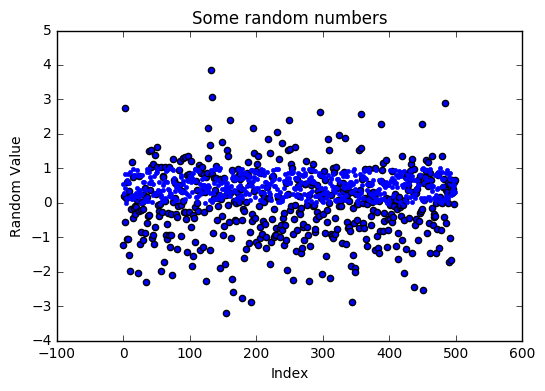

In [226]:
v1 = np.random.rand(500)
v2 = np.random.randn(500)
plt.plot(range(v1.shape[0]), v1, '.')
plt.scatter(range(len(v2)), v2)
plt.xlabel('Index')
plt.ylabel('Random Value')
plt.title('Some random numbers')
plt.show()

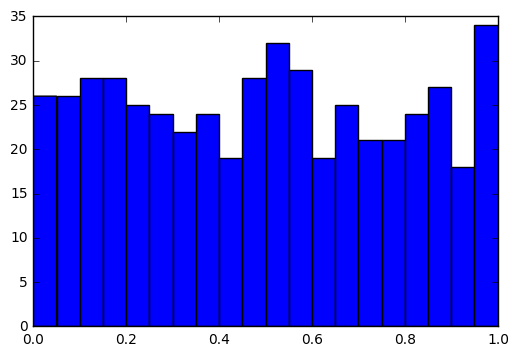

In [228]:
plt.hist(v1, bins=20);

''

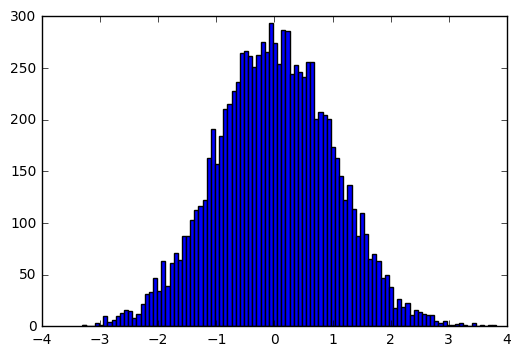

In [229]:
v2 = np.random.randn(10000)
plt.hist(v2, bins=100)
;

''

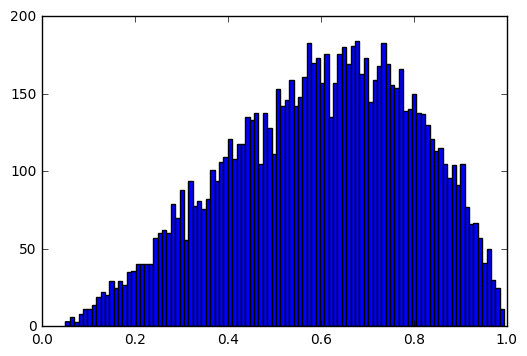

In [230]:
v3 = np.random.beta(3,2, 10000)
plt.hist(v3, bins=100)
;

In [ ]:
# in-class exercise
# generate a 1000 points in 2-d uniformly distributed on the rectangle [-1,1]x[0,0.5], then plot the points.

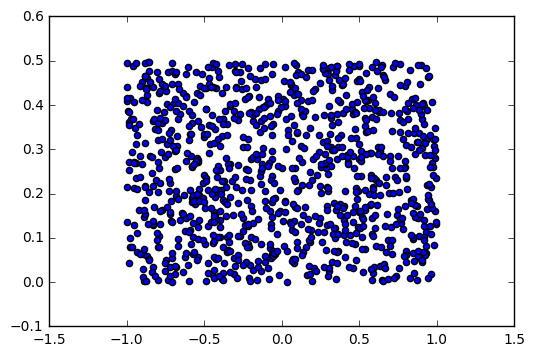

In [234]:
points = zip(np.random.rand(1000)*2-1,np.random.rand(1000)*0.5)
plt.scatter(np.array(points).T[0],np.array(points).T[1]);
# plt.scatter(*zip(*points));

# Numpy load, save data files

In [249]:
%ls -l HW03/

total 244
-rw-r--r-- 1 klimka klimka 72580 Sep 13 19:58 Camera_cleaned.csv
-rw-rw-r-- 1 klimka klimka 87053 Jun 23 07:58 Camera.csv
-rw-rw-r-- 1 klimka klimka 72580 Sep  6 16:20 Camera_mod.csv
-rw-rw-r-- 1 klimka klimka  3661 Sep  8 17:56 HW3_submission.ipynb
-rwxrwxr-x 1 klimka klimka   244 Sep  6 16:09 preprocess_data.sh*
-rw-rw-r-- 1 klimka klimka  3184 Sep  8 17:51 README.md


In [250]:
%%sh
./HW03/preprocess_data.sh HW03/Camera.csv HW03/Camera_cleaned.csv
head HW03/Camera.csv
head HW03/Camera_cleaned.csv

Model;Release date;Max resolution;Low resolution;Effective pixels;Zoom wide (W);Zoom tele (T);Normal focus range;Macro focus range;Storage included;Weight (inc. batteries);Dimensions;Price
STRING;DOUBLE;DOUBLE;DOUBLE;DOUBLE;DOUBLE;DOUBLE;DOUBLE;DOUBLE;DOUBLE;DOUBLE;DOUBLE;DOUBLE
Agfa ePhoto 1280;1997;1024.0;640.0;0.0;38.0;114.0;70.0;40.0;4.0;420.0;95.0;179.0
Agfa ePhoto 1680;1998;1280.0;640.0;1.0;38.0;114.0;50.0;0.0;4.0;420.0;158.0;179.0
Agfa ePhoto CL18;2000;640.0;0.0;0.0;45.0;45.0;0.0;0.0;2.0;0.0;0.0;179.0
Agfa ePhoto CL30;1999;1152.0;640.0;0.0;35.0;35.0;0.0;0.0;4.0;0.0;0.0;269.0
Agfa ePhoto CL30 Clik!;1999;1152.0;640.0;0.0;43.0;43.0;50.0;0.0;40.0;300.0;128.0;1299.0
Agfa ePhoto CL45;2001;1600.0;640.0;1.0;51.0;51.0;50.0;20.0;8.0;270.0;119.0;179.0
Agfa ePhoto CL50;1999;1280.0;640.0;1.0;34.0;102.0;0.0;0.0;8.0;0.0;0.0;179.0
Canon PowerShot 350;1997;640.0;0.0;0.0;42.0;42.0;70.0;3.0;2.0;320.0;93.0;149.0
Model;Release_date;Max_resolution;Low_resolution;Effective_pixels;Zoom_wide_W;Zoom_tele

In [251]:
DATA = np.genfromtxt('HW03/Camera_cleaned.csv', delimiter=';', names=True, dtype='float')

In [252]:
DATA

array([ (1.0, 1997.0, 1024.0, 640.0, 0.0, 38.0, 114.0, 70.0, 40.0, 4.0, 420.0, 95.0, 179.0),
       (2.0, 1998.0, 1280.0, 640.0, 1.0, 38.0, 114.0, 50.0, 0.0, 4.0, 420.0, 158.0, 179.0),
       (3.0, 2000.0, 640.0, 0.0, 0.0, 45.0, 45.0, 0.0, 0.0, 2.0, 0.0, 0.0, 179.0),
       ...,
       (1036.0, 2001.0, 2048.0, 1024.0, 3.0, 35.0, 98.0, 80.0, 10.0, 8.0, 340.0, 107.0, 62.0),
       (1037.0, 2001.0, 2400.0, 1200.0, 3.0, 35.0, 98.0, 80.0, 10.0, 16.0, 340.0, 107.0, 62.0),
       (1038.0, 2002.0, 1600.0, 800.0, 1.0, 38.0, 38.0, 40.0, 20.0, 8.0, 180.0, 86.0, 129.0)], 
      dtype=[('Model', '<f8'), ('Release_date', '<f8'), ('Max_resolution', '<f8'), ('Low_resolution', '<f8'), ('Effective_pixels', '<f8'), ('Zoom_wide_W', '<f8'), ('Zoom_tele_T', '<f8'), ('Normal_focus_range', '<f8'), ('Macro_focus_range', '<f8'), ('Storage_included', '<f8'), ('Weight_inc_batteries', '<f8'), ('Dimensions', '<f8'), ('Price', '<f8')])

In [255]:
DATA['Max_resolution'].max()

5616.0

In [256]:
np.nanargmin(DATA['Max_resolution'])

370

In [257]:
np.savetxt('Cameras_TMP.csv', DATA, delimiter=',')

In [260]:
%%sh
ls -l
rm Cameras_TMP.csv

total 3024
-rw-rw-r-- 1 klimka klimka  650999 Aug 27 16:42 APD-Crime-Data_orig.ipynb
-rw-r--r-- 1 klimka klimka  337203 Sep 13 20:17 Cameras_TMP.csv
drwxrwxr-x 3 klimka klimka    4096 Sep 11 18:41 HW03
-rw-rw-r-- 1 klimka klimka  232486 Sep 13 20:16 Introduction_class.ipynb
-rw-rw-r-- 1 klimka klimka  135673 Sep 11 16:25 Introduction_orig.ipynb
-rw-rw-r-- 1 klimka klimka   58770 Aug 27 16:42 linear-algebra-python-basics.ipynb
-rw-rw-r-- 1 klimka klimka 1047866 Aug 27 16:42 LinearRegression.ipynb
-rw-rw-r-- 1 klimka klimka  520177 Aug 27 16:42 LinearRegression_orig.ipynb
-rw-rw-r-- 1 klimka klimka     484 Sep  6 16:08 README.md
-rw-rw-r-- 1 klimka klimka   92411 Aug 27 16:42 SeabornDemo.ipynb


In [261]:
import pickle

with open('Cameras.pkl','wb') as f:
    pickle.dump(DATA, f) # pickle.dump(DATA, open('Cameras.pkl','wb'))
    
# Shortcut:
np.save('Cameras2.pkl', DATA, allow_pickle=True)

%ls -l

total 3376
-rw-rw-r-- 1 klimka klimka  650999 Aug 27 16:42 APD-Crime-Data_orig.ipynb
-rw-r--r-- 1 klimka klimka  108368 Sep 13 20:20 Cameras2.pkl.npy
-rw-r--r-- 1 klimka klimka  363158 Sep 13 20:20 Cameras.pkl
drwxrwxr-x 3 klimka klimka    4096 Sep 11 18:41 HW03/
-rw-rw-r-- 1 klimka klimka  233610 Sep 13 20:20 Introduction_class.ipynb
-rw-rw-r-- 1 klimka klimka  135673 Sep 11 16:25 Introduction_orig.ipynb
-rw-rw-r-- 1 klimka klimka   58770 Aug 27 16:42 linear-algebra-python-basics.ipynb
-rw-rw-r-- 1 klimka klimka 1047866 Aug 27 16:42 LinearRegression.ipynb
-rw-rw-r-- 1 klimka klimka  520177 Aug 27 16:42 LinearRegression_orig.ipynb
-rw-rw-r-- 1 klimka klimka     484 Sep  6 16:08 README.md
-rw-rw-r-- 1 klimka klimka   92411 Aug 27 16:42 SeabornDemo.ipynb


In [262]:
with open('Cameras.pkl','rb') as f:
    datapkl = pickle.load(f)
    
# Shortcut:
datapkl2 = np.load('Cameras2.pkl.npy')

In [263]:
datapkl

array([ (1.0, 1997.0, 1024.0, 640.0, 0.0, 38.0, 114.0, 70.0, 40.0, 4.0, 420.0, 95.0, 179.0),
       (2.0, 1998.0, 1280.0, 640.0, 1.0, 38.0, 114.0, 50.0, 0.0, 4.0, 420.0, 158.0, 179.0),
       (3.0, 2000.0, 640.0, 0.0, 0.0, 45.0, 45.0, 0.0, 0.0, 2.0, 0.0, 0.0, 179.0),
       ...,
       (1036.0, 2001.0, 2048.0, 1024.0, 3.0, 35.0, 98.0, 80.0, 10.0, 8.0, 340.0, 107.0, 62.0),
       (1037.0, 2001.0, 2400.0, 1200.0, 3.0, 35.0, 98.0, 80.0, 10.0, 16.0, 340.0, 107.0, 62.0),
       (1038.0, 2002.0, 1600.0, 800.0, 1.0, 38.0, 38.0, 40.0, 20.0, 8.0, 180.0, 86.0, 129.0)], 
      dtype=[('Model', '<f8'), ('Release_date', '<f8'), ('Max_resolution', '<f8'), ('Low_resolution', '<f8'), ('Effective_pixels', '<f8'), ('Zoom_wide_W', '<f8'), ('Zoom_tele_T', '<f8'), ('Normal_focus_range', '<f8'), ('Macro_focus_range', '<f8'), ('Storage_included', '<f8'), ('Weight_inc_batteries', '<f8'), ('Dimensions', '<f8'), ('Price', '<f8')])

In [264]:
datapkl2

array([ (1.0, 1997.0, 1024.0, 640.0, 0.0, 38.0, 114.0, 70.0, 40.0, 4.0, 420.0, 95.0, 179.0),
       (2.0, 1998.0, 1280.0, 640.0, 1.0, 38.0, 114.0, 50.0, 0.0, 4.0, 420.0, 158.0, 179.0),
       (3.0, 2000.0, 640.0, 0.0, 0.0, 45.0, 45.0, 0.0, 0.0, 2.0, 0.0, 0.0, 179.0),
       ...,
       (1036.0, 2001.0, 2048.0, 1024.0, 3.0, 35.0, 98.0, 80.0, 10.0, 8.0, 340.0, 107.0, 62.0),
       (1037.0, 2001.0, 2400.0, 1200.0, 3.0, 35.0, 98.0, 80.0, 10.0, 16.0, 340.0, 107.0, 62.0),
       (1038.0, 2002.0, 1600.0, 800.0, 1.0, 38.0, 38.0, 40.0, 20.0, 8.0, 180.0, 86.0, 129.0)], 
      dtype=[('Model', '<f8'), ('Release_date', '<f8'), ('Max_resolution', '<f8'), ('Low_resolution', '<f8'), ('Effective_pixels', '<f8'), ('Zoom_wide_W', '<f8'), ('Zoom_tele_T', '<f8'), ('Normal_focus_range', '<f8'), ('Macro_focus_range', '<f8'), ('Storage_included', '<f8'), ('Weight_inc_batteries', '<f8'), ('Dimensions', '<f8'), ('Price', '<f8')])

In [265]:
%rm Cameras.pkl
%rm Cameras2.pkl.npy

In [ ]:
# For saving multiple variables in workspace: import shelve

# Example Nearest Neighbor search
Nearest Neighbor search is a common technique in Machine Learning

In [282]:
points = [[9,2,8],[4,7,2],[3,4,4],[5,6,9],[5,0,7],[8,2,7],[0,3,2],[7,3,0],[6,1,1],[2,9,6]]
qPoint = [4,5,3]
# which point in points is closest to qPoint?

In [ ]:
# Euclidean distance between 2 points [x1,y1,z1] and [x2,y2,z2] is:
# sqrt((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)

In [283]:
### Pure iterative Python ###
points = [[9,2,8],[4,7,2],[3,4,4],[5,6,9],[5,0,7],[8,2,7],[0,3,2],[7,3,0],[6,1,1],[2,9,6]]
qPoint = [4,5,3]

minIdx = -1
minDist = -1
for idx, point in enumerate(points):  # iterate over all points
        print "index is %d, point is %s" % (idx, point)
        dist = sum([(dp-dq)**2 for dp,dq in zip(point,qPoint)])**0.5  # compute the euclidean distance for each point to q
        if dist < minDist or minDist < 0:  # if necessary, update minimum distance and index of the corresponding point
            minDist = dist
            minIdx = idx

print 'Nearest point to q: ', points[minIdx]

index is 0, point is [9, 2, 8]
index is 1, point is [4, 7, 2]
index is 2, point is [3, 4, 4]
index is 3, point is [5, 6, 9]
index is 4, point is [5, 0, 7]
index is 5, point is [8, 2, 7]
index is 6, point is [0, 3, 2]
index is 7, point is [7, 3, 0]
index is 8, point is [6, 1, 1]
index is 9, point is [2, 9, 6]
Nearest point to q:  [3, 4, 4]


In [284]:
# # # Equivalent NumPy vectorization # # #
import numpy as np
points = np.array([[9,2,8],[4,7,2],[3,4,4],[5,6,9],[5,0,7],[8,2,7],[0,3,2],[7,3,0],[6,1,1],[2,9,6]])
qPoint = np.array([4,5,3])
minIdx = np.argmin(np.linalg.norm(points-qPoint,axis=1))  # compute all euclidean distances at once and return the index of the smallest one
print 'Nearest point to q: ', points[minIdx]

Nearest point to q:  [3 4 4]


# Example: Linear Regression

**Linear regression** is an approach for modeling the relationship between a scalar dependent variable $y$ and one or more explanatory variables (or independent variables) denoted $X$. The case of one explanatory variable is called *simple linear regression*. For more than one explanatory variable, the process is called *multiple linear regression*.$^1$ (This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.$^2$

We assume that the equation

$y_i = \beta_0 + \beta_1 X_i + \epsilon_i$ where $\epsilon_i \approx N(0, \sigma^2)$


***
$^1$ David A. Freedman (2009). Statistical Models: Theory and Practice. Cambridge University Press. p. 26. A simple regression equation has on the right hand side an intercept and an explanatory variable with a slope coefficient. A multiple regression equation has two or more explanatory variables on the right hand side, each with its own slope coefficient

$^2$ Rencher, Alvin C.; Christensen, William F. (2012), "Chapter 10, Multivariate regression – Section 10.1, Introduction", Methods of Multivariate Analysis, Wiley Series in Probability and Statistics, 709 (3rd ed.), John Wiley &amp; Sons, p. 19, ISBN 9781118391679.

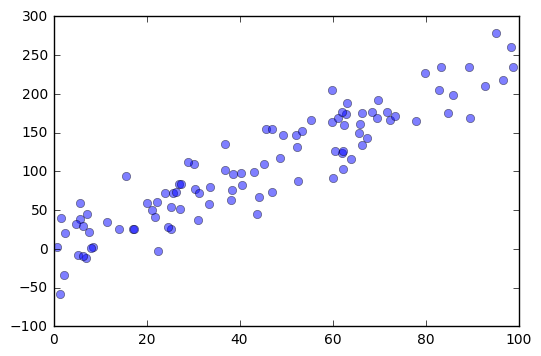

In [291]:
n = 100  # numeber of samples
Xr = np.random.rand(n)*99.0
y = -7.3 + 2.5*Xr + np.random.randn(n)*27.0
plt.plot(Xr, y, "o", alpha=0.5);

Let's add the *bias*, i.e. a column of $1$s to the explanatory variables

In [292]:
X = np.vstack((np.ones(n), Xr)).T
print X.shape
X[0:10,:]

(100, 2)


array([[  1.        ,  61.97352568],
       [  1.        ,  62.30662457],
       [  1.        ,   7.02231372],
       [  1.        ,  38.69648292],
       [  1.        ,  66.41528033],
       [  1.        ,   5.76376214],
       [  1.        ,  67.46176025],
       [  1.        ,  36.92342092],
       [  1.        ,  98.75991963],
       [  1.        ,  72.29709866]])

## Closed-form Linear Regression

And compute the parametes $\beta_0$  and $\beta_1$ according to
$$ \beta = (X^\prime X)^{-1} X^\prime y $$
***
**Note:**
This not only looks elegant but can also be written in Julia code. However, matrix inversion $M^{-1}$ requires $O(d^3)$ iterations for a $d\times d$ matrix.<br /> 
https://www.coursera.org/learn/ml-regression/lecture/jOVX8/discussing-the-closed-form-solution

In [293]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [294]:
yhat = X.dot(beta)
yhat.shape

(100,)

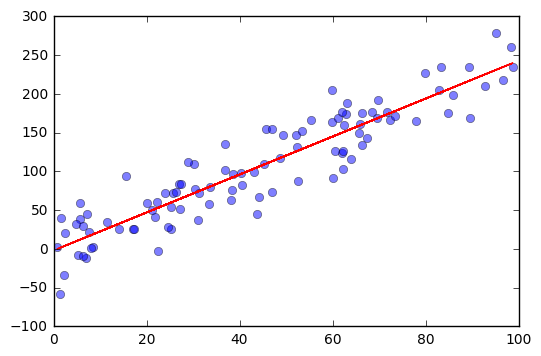

In [295]:
plt.plot(X[:,1], y, "o", alpha=0.5)
plt.plot(X[:,1], yhat, "-", alpha=1, color="red")

In [296]:
beta

array([-1.9323329 ,  2.44874906])

## Multiple Linear Regression

''

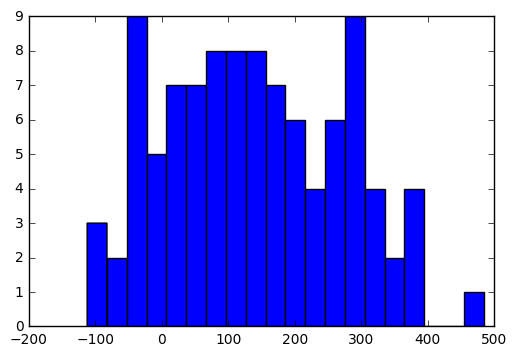

In [297]:
n = 100  # numeber of samples
X1 = np.random.rand(n)*99.0
X2 = np.random.rand(n)*51.0 - 26.8
X3 = np.random.rand(n)*5.0 + 6.1
X4 = np.random.rand(n)*1.0 - 0.5
X5 = np.random.rand(n)*300.0

y_m = -7.3 + 2.5*X1 + -7.9*X2 + 1.5*X3 + 10.0*X4 + 0.13*X5 + np.random.randn(n)*7.0
plt.hist(y_m, bins=20)
;

In [298]:
X_m = np.vstack((np.ones(n), X1, X2, X3, X4, X5)).T
X_m.shape
X_m[:5]

array([[  1.00000000e+00,   7.87254578e+01,   5.79392004e+00,
          9.23904879e+00,  -4.30247149e-01,   2.46031647e+02],
       [  1.00000000e+00,   2.91761682e+01,  -4.31353400e+00,
          9.81830252e+00,   3.81949696e-01,   2.28261565e+02],
       [  1.00000000e+00,   6.91467395e+01,  -2.12907404e+01,
          7.22969351e+00,  -4.19864300e-01,   1.71674799e+02],
       [  1.00000000e+00,   4.66818561e+01,   1.90678555e+01,
          7.79765125e+00,   8.72368223e-02,   1.19724373e+02],
       [  1.00000000e+00,   2.13247283e+01,   1.99083214e+01,
          1.03699124e+01,   3.22850499e-01,   7.61743075e+01]])

In [299]:
beta_m = np.linalg.inv(X_m.T.dot(X_m)).dot(X_m.T).dot(y_m)
beta_m

array([-8.31523529,  2.50466068, -7.90093854,  1.46755969,  9.06000428,
        0.13216386])

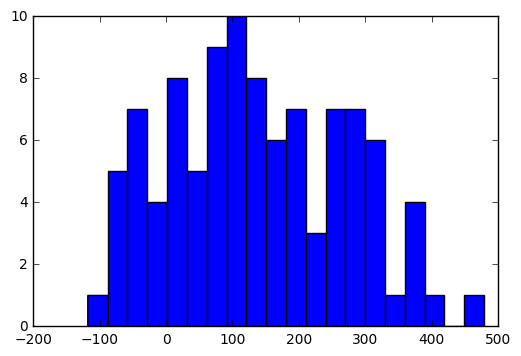

In [302]:
yhat_m = X_m.dot(beta_m)
yhat_m.shape
plt.hist(yhat_m, bins=20);

## Evaluation: Root-mean-square Deviation
The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a good measure of accuracy, but only to compare forecasting errors of different models for a particular variable and not between variables, as it is scale-dependent.$^1$

![](imgs/fc187c3557d633423444d4c80a4a50cd6ecc3dd4.svg)
***
$^1$  Hyndman, Rob J. Koehler, Anne B.; Koehler (2006). "Another look at measures of forecast accuracy". International Journal of Forecasting. 22 (4): 679–688. doi:10.1016/j.ijforecast.2006.03.001.

In [303]:
import math
RSMD = math.sqrt(np.square(yhat_m-y_m).sum()/n)
print RSMD

7.32215370465


## Regularization, Ridge-Regression

Regularization, in mathematics and statistics and particularly in the fields of machine learning and inverse problems, is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting.


In general, a regularization term $R(f)$ is introduced to a general loss function:

![](imgs/872d3606639c7bc8ad91ab4a2976663a77d657c3.svg)
for a loss function  $V$ that describes the cost of predicting $f(x)$ when the label is 
$y$, such as the square loss or hinge loss, and for the term 
$\lambda$  which controls the importance of the regularization term. 
$R(f)$ is typically a penalty on the complexity of 
$f$, such as restrictions for smoothness or bounds on the vector space norm.$^1$

A theoretical justification for regularization is that it attempts to impose Occam's razor on the solution, as depicted in the figure. From a Bayesian point of view, many regularization techniques correspond to imposing certain prior distributions on model parameters.

Regularization can be used to learn simpler models, induce models to be sparse, introduce group structure into the learning problem, and more.

We're going to add the L2 term $\lambda||\beta||_2^2$ to the regression equation, which yields to$^2$

$$ \beta = (X^\prime X + \lambda I)^{-1} X^\prime y $$

***
$^1$ Bishop, Christopher M. (2007). Pattern recognition and machine learning (Corr. printing. ed.). New York: Springer. ISBN 978-0387310732.

$^2$ http://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution

In [ ]:
p = X.shape[1]  ## get number of parameters
lam = 10.0
p, lam

In [ ]:

beta2 = np.linalg.inv(X.T.dot(X) + lam*np.eye(p)).dot(X.T).dot(y)

In [ ]:
yhat2 = X.dot(beta2)

In [ ]:
RSMD2 = math.sqrt(np.square(yhat2-y).sum()/n)
print RSMD2

In [ ]:
##n = float(X.shape[0])
print "      RMSE = ", math.sqrt(np.square(yhat-y).sum()/n)
print "Ridge RMSE = ", math.sqrt(np.square(yhat2-y).sum()/n)
plt.plot(X[:,1], y, "o", alpha=0.5)
plt.plot(X[:,1], yhat, "-", alpha=0.7, color="red")
plt.plot(X[:,1], yhat2, "-", alpha=0.7, color="green")